# DBSCAN demo in 2D

In [1]:
import numpy as np
import numpy.random as npr

import os 

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics.pairwise import euclidean_distances

import matplotlib.pyplot as plt
%matplotlib inline

def plot_clust(X,W=None,z=None):
    if z is not None:
        if np.any(z<0):
            plt.scatter(X[z<0,0], X[z<0,1], marker="o", 
                        facecolors='none', edgecolor='black', alpha=0.3);
        if np.any(z>=0):
            plt.scatter(X[z>=0,0], X[z>=0,1], marker="o", c=z[z>=0], alpha=0.3);
    else:
        plt.scatter(X[:,0], X[:,1], marker="o", c='black', alpha=0.3);
    if W is not None:
        plt.scatter(W[:,0], W[:,1], marker="^", s=200, c=np.arange(W.shape[0]));
    else:
        plt.title("number of clusters = %d" % len(set(np.unique(z))-set([-1])));

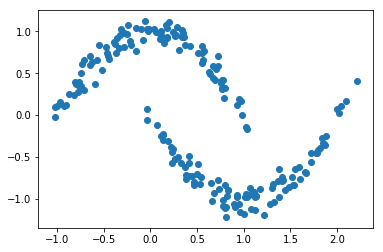

In [2]:
n1 = 100
x1 = np.linspace(-1,1,n1) + npr.randn(n1)*.1
y1 = 1-x1**2 + npr.randn(n1)*.1
n2 = 100
x2 = np.linspace(0,2,n2) + npr.randn(n2)*.1
y2 = (x2-1)**2-1 + npr.randn(n2)*.1
x = np.concatenate((x1,x2))
y = np.concatenate((y1,y2))
plt.scatter(x,y)
X = np.concatenate((x[:,None],y[:,None]),axis=1)

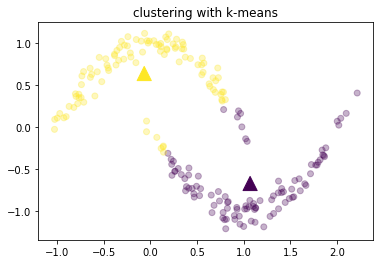

In [3]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

plot_clust(X,kmeans.cluster_centers_, kmeans.labels_)
plt.title("clustering with k-means");

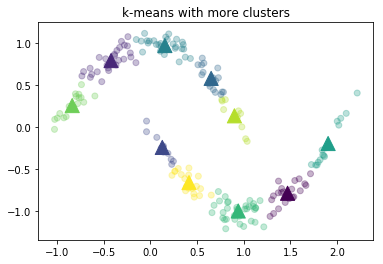

In [4]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)

plot_clust(X,kmeans.cluster_centers_, kmeans.labels_)
plt.title("k-means with more clusters");

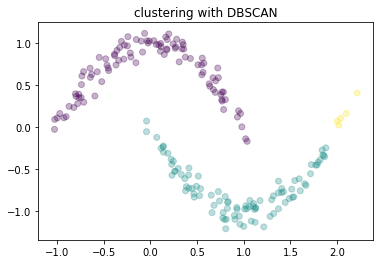

In [5]:
dbscan = DBSCAN(eps=0.3)
dbscan.fit(X)
plot_clust(X,z=dbscan.labels_)
plt.title("clustering with DBSCAN");

### Effect of the DBSCAN hyperparameters

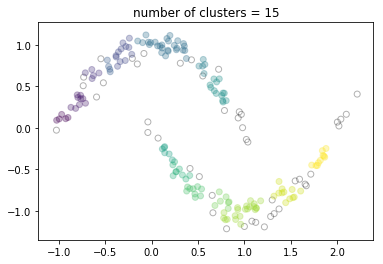

In [6]:
dbscan = DBSCAN(eps=0.1)
dbscan.fit(X)
plot_clust(X,z=dbscan.labels_)

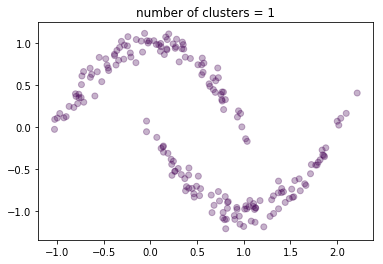

In [7]:
dbscan = DBSCAN(eps=1)
dbscan.fit(X)
plot_clust(X,z=dbscan.labels_)

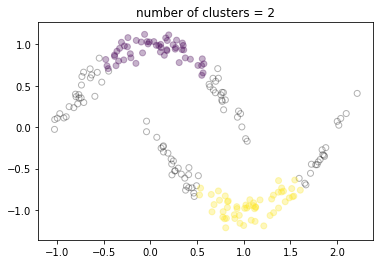

In [8]:
dbscan = DBSCAN(eps=0.3, min_samples=25)
dbscan.fit(X)
plot_clust(X,z=dbscan.labels_)

## Effect of initialization with DBSCAN

We can change the "initialization" by re-ordering the points. The effects are small but can change the label of some points between clusters.

In [9]:
X_extra = np.concatenate((X, [[0.5,0]]), axis=0)

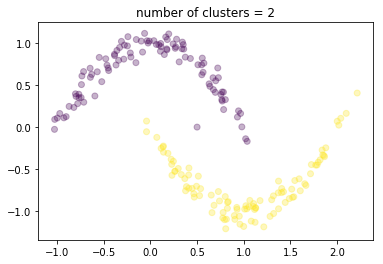

In [10]:
dbscan = DBSCAN(eps=0.4)
dbscan.fit(X_extra)
plot_clust(X_extra,z=dbscan.labels_)

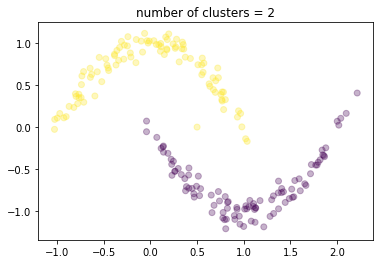

In [11]:
X_extra_reversed = X_extra[::-1]

dbscan = DBSCAN(eps=0.4)
dbscan.fit(X_extra_reversed)
plot_clust(X_extra_reversed,z=dbscan.labels_)

Above, we reversed the order of the data set which flipped the cluster colours. But, notice the middle point was originally in the top cluster and is now in the bottom cluster.

### An example where k-means works better

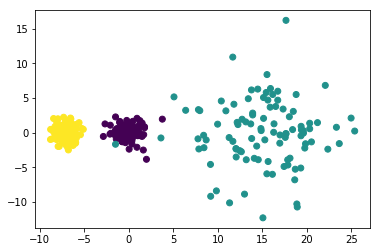

In [12]:
n1 = 100
μ1 = [0,0]
σ1 = 1
X1 = σ1*npr.randn(n1,2) + μ1

n2 = 100
μ2 = [15,0]
σ2 = 5
X2 = σ2*npr.randn(n2,2) + μ2

n3 = 100
μ3 = [-7,0]
σ3 = 1
X3 = σ3*npr.randn(n3,2) + μ3


X = np.concatenate((X1,X2,X3))
z_true = np.concatenate((np.zeros(n1),np.ones(n2),np.ones(n2)+1))

plt.scatter(X[:,0],X[:,1], c=z_true);

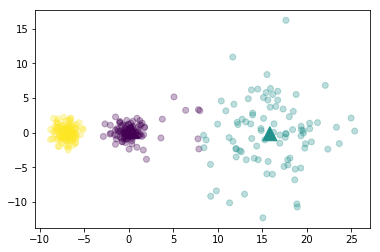

In [13]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
plot_clust(X,kmeans.cluster_centers_, kmeans.labels_)

$k$-means performs reasonably here, although of course it gets the benefit of me telling it the true number of clusters.

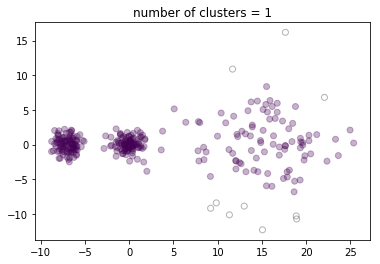

In [14]:
dbscan = DBSCAN(eps=3, min_samples=5)
dbscan.fit(X)
plot_clust(X,z=dbscan.labels_)

This doesn't look too great. You can try fiddling with the hyperparameters of DBSCAN here. The example is problematic because we have two different densities of clusters, and yet the `eps` parameter roughly sets a single density of cluster that we're looking for. If we make `eps` large enough to keep the non-dense (right-hand) cluster together, then it'll also end up joining the left two clusters.